In [1]:
import csv
import math
import nltk
import numpy as np
from nltk.tokenize import TweetTokenizer
from sklearn.linear_model import LinearRegression

## Computing Tokens, Types, and TTR

Types: Number of distinct words in corpus.
Tokens: Number of running words in corpus.

TTR(Type Token Ratio): $\frac{Types}{Tokens}$

In [2]:
# Importing Data
text =''
with open('tweets-dataset.csv','r',encoding='utf-8') as fp:
    data = csv.reader(fp)
    for row in data:
        text = text+ ' '+ str(row)

In [3]:
# Tokenizing the tweets
tt=nltk.TweetTokenizer()
tokens = tt.tokenize(text)

# Removing tokens containing non-alphabetical characters such as #, @ etc.
# Also, removing tokens with http in them -> they are sliced or incomplete version of URLs.
def process_tokens(tokens):    
    new_tokens=[]
    for each_token in tokens:
        if each_token.isalpha() and 'http' not in each_token:
            new_tokens.append(each_token.lower())
    return new_tokens

tokens = process_tokens(tokens)
types = set(tokens)

print('\nNumber of Tokens: ', len(tokens))
print('\nNumber of Types: ', len(types))
print('\nTTR : '+str(len(types)/len(tokens)))


Number of Tokens:  283294

Number of Types:  30467

TTR : 0.10754551808368691


## Zipf's Law of Length and Frequency

According to the Zipf's law of corelation the lengths and word frequency, it obeys:
\[l \propto \frac{1}{f}\]

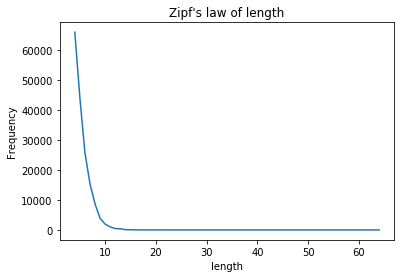

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  


wordlength_freq=dict()
for each_token in tokens:
    if len(each_token) in wordlength_freq:
        wordlength_freq[len(each_token)]+=1
    else:
        wordlength_freq[len(each_token)]=1
        
X,Y = [],[]
wordlength_freq = dict(sorted(wordlength_freq.items()))
# Not taking into account words with length 1,2,3
# These values creates noise in the graph
wordlength_freq.pop(1)
wordlength_freq.pop(2)
wordlength_freq.pop(3)

for key,val in wordlength_freq.items():
    X.append(key)
    Y.append(val)

#Plot
plt.plot(X,Y)
plt.title("Zipf's law of length")
plt.xlabel('length')
plt.ylabel('Frequency')
plt.show()    

We observe that the graph is very similar to that of $x = \frac{c}{y}$. Hence, validating Zipf's law. 

## Zipf's Law of Meanings

### Solution

According to the Zipf's law of corelation between number of meanings and word frequency, it obeys:
\[m \propto \sqrt{f}\]

Now, we saw above that corelation between word length and frequence i.e, 
\[l \propto \frac{1}{f} \]

Using $eq(1)$ and $eq(2)$, we can derive the relation that,
\[m \propto \frac{1}{\sqrt{l}}\]
i.e \[m = \frac{c}{\sqrt{l}}\] where $c$ is a constant.

Hence, the graph between $m$ and $\frac{1}{\sqrt{l}}$ must follow a straight line passing via origin.

In [5]:
import nltk 
from nltk.corpus import wordnet 

def find_syn(word):
    synonyms = 0
    for syn in wordnet.synsets(word): 
        for l in syn.lemmas(): 
            synonyms+=1
    return synonyms

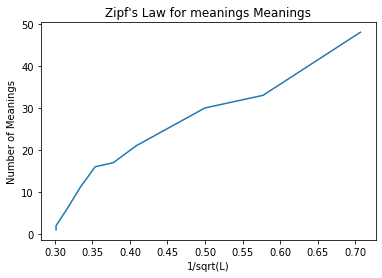

In [6]:
fq_words = []
n_meanings=[]
words = ['outsourcing', 'intolerance' ,'theatrical', 'entertain', 'designer','society','happen', 'true',
         'man', 'do']

for i in words:
    fq_words.append(1/ math.sqrt(len(i)))
    n_meanings.append(find_syn(i))


X,Y = n_meanings, fq_words

plt.plot(Y,X)
plt.title("Zipf's Law for meanings Meanings")
plt.xlabel('1/sqrt(L)')
plt.ylabel('Number of Meanings')
plt.show()

We can see from the graph that is ploted above that there is aproximately a linear relationship between these two variables. Hence, validating the Zipf's Law. 

## Heap's Law

According to Heap's Law, following relation exists between size of vocabulary and number of tokens.
\[|V| = K N ^{\beta} \]
in which, $|V|$ is size of vocabulary and $N$ is the number of tokens.
Whereas, $K \approx 10 - 100$ and $\beta \approx 0.4 - 0.6$
         


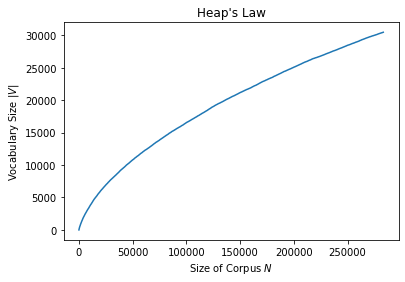

In [7]:
visited=[]
n,v = 0,0

#V is the list of Vocabulary length and N is the list of corpus size 
V,N = [],[]
for each_token in tokens:
    n+=1
    N.append(n)
    if each_token not in visited:
        v+=1
        visited.append(each_token)
    V.append(v)

#Plot between N and |V|
plt.plot(N,V)
plt.title("Heap's Law")
plt.xlabel('Size of Corpus $N$')
plt.ylabel('Vocabulary Size $|V|$')
plt.show()

In [8]:
# Linear Regression with log values
log_N,log_V =[],[]

for i in range(len(N)):
    log_N.append(math.log(N[i]))
    log_V.append(math.log(V[i]))
log_N, log_V = np.asarray(log_N), np.asarray(log_V)
reg=LinearRegression().fit(log_N.reshape(-1,1),log_V)

score = reg.score(log_N.reshape(-1,1), log_V)

beta = reg.coef_[0]
K_ = math.exp(reg.intercept_)

print("Predicted value of beta:  ", beta)
print("Predicted value of K:  ",K_)
print("Score with these predicted values: ",score)

Predicted value of beta:   0.6507823134769163
Predicted value of K:   9.02947363269811
Score with these predicted values:  0.9950091314824819


### Explanation

From Heap's Law, We know that there is not a linear relationship between $|V|$ and $N$. It is an exponential one. 

However, if we take $log$ on both sides of the $eq(5)$ then,
\[ \log{|V|} = \log{K} + \beta\log{N} \]

We observe that now, a linear relationship exists between $\log{|V|}$ and $\log{N}$. Hence, in order to find out the values of remaining variables we can apply Linear Regression to the values of $\log{|V|}$ and $\log{N}$.

Since, the coefficient and the intercept obtained are the values of $\beta$ and $\log{K}$.
Hence, $\beta$ equals the coefficient and $K$ equals $e^{intercept}$

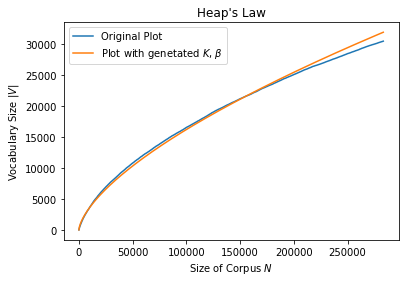

In [10]:
#Producin vocabulary using the obtained values of K and beta
V_produced = [K_*((size)**beta) for size in N]


#Plot
plt.plot(N,V, label='Original Plot')
plt.plot(N,V_produced, label='Plot with genetated $K$, $\\beta$')
plt.title("Heap's Law")
plt.xlabel('Size of Corpus $N$')
plt.ylabel('Vocabulary Size $|V|$')
plt.legend()
plt.show()